# О Google Colaboratory

**Google Colaboratoty** -- это виртуальная машина на основе Linux, с установленным Python и большим количеством библиотек, запускаемая на серверах Google.

**Виртуальная машина** имеет только интерфейс среды разработки Jupyter Notebook.

В Jupyter Notebook код записывается в отдельных блоках — *ячейках*.
Ячейки могут быть запущены отдельно.

В Jupyter Notebook ячейки могут содержать
* код, консольные команды
* текст; поддерживается markdown, некоторые html теги (img и др), и формулы в нотации LaTeX.

Для запуска кода нужно войти в аккаунт Google.

<br>
<br>


* [ ] todo: некоторые консольные программы linux

In [ ]:
!pwd

/content/sample_data


In [ ]:
%cd sample_data/

[Errno 2] No such file or directory: 'sample_data/'
/content/sample_data


In [ ]:
# однажды созданная переменная остаётся в памяти до перезапуска
a = 42

In [ ]:
# переменные можно выводить просто указявая их имя в последней строке ячейки
a

42

In [ ]:
# это не сработает, если не запустить ячейку ниже
print(b)

100


In [ ]:
b = 100
#

# Создание датасета

Рассмотрим задачу регрессии

In [ ]:
# sklearn - Sci Kit Learn - самая популярная библиотека для анализа данных и машинного обучения.
import sklearn

from sklearn.datasets import make_regression
# функция для создания синтетического (искусственного) датасета, набора данных.
# На примере таких датасетов удобно изучать и тестировать подходы к анализу и обработке данных, изучать алгоритмы машинного обучения.
# документация: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html

In [ ]:
# создание синтетического датасета
X, y = make_regression(n_samples= 100_000, n_features = 3, n_targets = 1, random_state = 42)
# X - матрица 100000x3 - значения трёх независимых признаков (свойств) для 100k объектов
# y - значения зависимого (целевого) признака - признака, который нужно научится предсказывать.
# random_state - число для инициализации генератора псевдослучайных чисел.
# Если не задано, то результат работы функции при каждом запуске будет разный

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

# разделение данных на тренировочную (для обучения) и отложенную (тестовую, для проверки модели) выборки
X_train, X_test, y_train, y_test = train_test_split(X, y,                   # X,y - разделяемые данные
                                                    test_size=0.2,          # доля тестовой выборки (можно указать целое число, тогда это будет количеством объектов)
                                                    shuffle=True,           # перемешать объекты перед разделением (включено по умолчанию)
                                                    random_state = 0
                                                    )
# X_train, y_train - используются для обучения модели
# X_test, y_test - используются только для проверки модели,

Проверка модели на данных, которые она раньше не встречала, более объективна чем проверка только на обучающей выборке. Если качество модели (например MSE для регрессии) на тестовой выборке существенно хуже, значит модель переобучилась.

In [ ]:
X_train.shape

(80000, 3)

In [ ]:
print(f"Train Size = {len(y_train):8,} ")
print(f"Test Size =  {len(y_test):8,} ")
# :8, -- выводить целое число разделяя тысячи, использовать поле шириной 8, выравнивание по правому краю (по умолчанию)
# рекомендуется для контроля выводить подобные значения

print(f"Количество независимых признаков {X.shape[1]} ")            # поле shape массива типа numpy array хранит размерности

assert len(y_train) == 80_000

Train Size =   80,000 
Test Size =    20,000 
Количество независимых признаков 3 


In [ ]:
X_train

array([[-0.72739966,  2.22453357,  0.58075124],
       [-0.4948829 , -1.49294488,  0.30897124],
       [-1.17559461,  0.17183934,  0.55325122],
       ...,
       [ 2.06638029, -0.20654535,  0.72711243],
       [-1.32708165, -0.11618533, -0.59878052],
       [-1.68265869,  1.45092755,  1.80719664]])

In [ ]:
y

array([ 45.45010317, 162.52316606, -37.150086  , ...,  27.23085769,
       -95.2775265 , -31.25120446])

# Разведочный анализ данных (EVA - exploratory data analysis)

См. подсказки и примеры по визуализации в https://miro.com/app/board/uXjVNQC1rq8=/

In [ ]:
# pandas -- библиотека для табличного представления и обработки данных
import pandas as pd

# для примера выведем датасет в табличном виде
data = pd.DataFrame( {'x1': X[:, 0], 'x2': X[:, 1], 'x3': X[:, 2], 'y':y}  )

In [ ]:
data

,x1,x2,x3,y
0,0.896987,0.470192,0.531624,45.450103
1,0.170607,2.552249,0.323295,162.523166
2,1.537896,-0.454843,-0.744199,-37.150086
3,0.183851,0.362299,0.093099,24.993000
4,-0.529395,-0.618498,0.985225,-16.835814
...,...,...,...,...
99995,2.283513,-0.076122,-1.101288,-18.905120
99996,-1.551446,0.571059,1.337204,58.051334
99997,1.250938,0.097142,0.637772,27.230858
99998,0.652175,-1.343205,-0.744455,-95.277526


#### 7 point summary

In [ ]:
# 7-point summary
data.describe()
# помимо прочего по этой таблице легко судить о диапазоне значений,
# можно обнаружить ошибки, например реалистично большой максимум для года, или отрицательное значение для стоимости

,x1,x2,x3,y
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.001723,-0.000599,-0.000685,-0.043483
std,0.999692,0.999971,1.000036,65.039849
min,-4.413886,-4.465604,-4.462969,-300.469012
25%,-0.671911,-0.675831,-0.675269,-43.839282
50%,0.001452,0.001969,-0.003460,0.000387
75%,0.675133,0.674366,0.675108,43.751643
max,4.562115,4.479084,3.824992,298.695760


Колонки — признаки, \
Строки — числовые характеристики признаков

- count - количество
- mean - среднее
- std - стандартное отклонение
- 25% - первый квартиль (Q1) — 25% значений меньше данного показателя
- 50% - второй квартиль (Q2), медиана — 50% значений меньше данного показателя
- 75% - третий квартиль (Q3) —    75% значений меньше данного показателя

In [ ]:
data.corr()

,x1,x2,x3,y
x1,1.000000,-0.003816,0.001713,0.075206
x2,-0.003816,1.000000,0.003375,0.928905
x3,0.001713,0.003375,1.000000,0.365115
y,0.075206,0.928905,0.365115,1.000000


<Axes: >

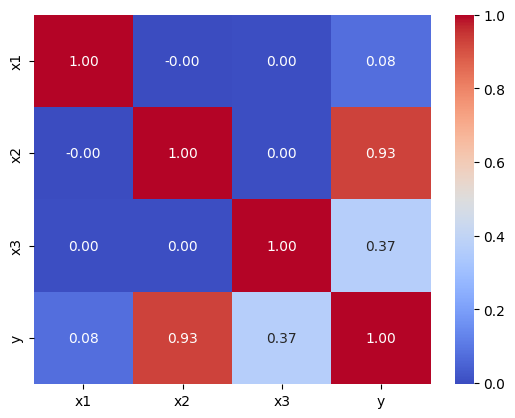

In [ ]:
import seaborn

seaborn.heatmap( data.corr(), annot=True, cmap='coolwarm', fmt=".2f")

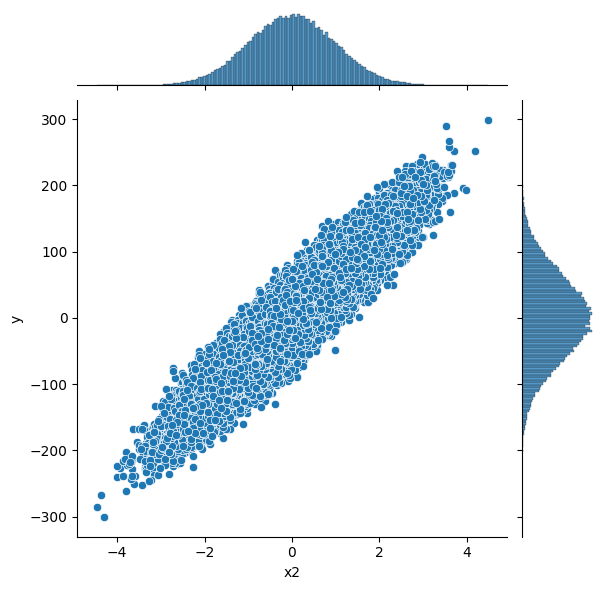

In [ ]:
# seaborn.jointplot( x=X[:,1], y=y )
seaborn.jointplot( data=data, x='x2', y='y' )

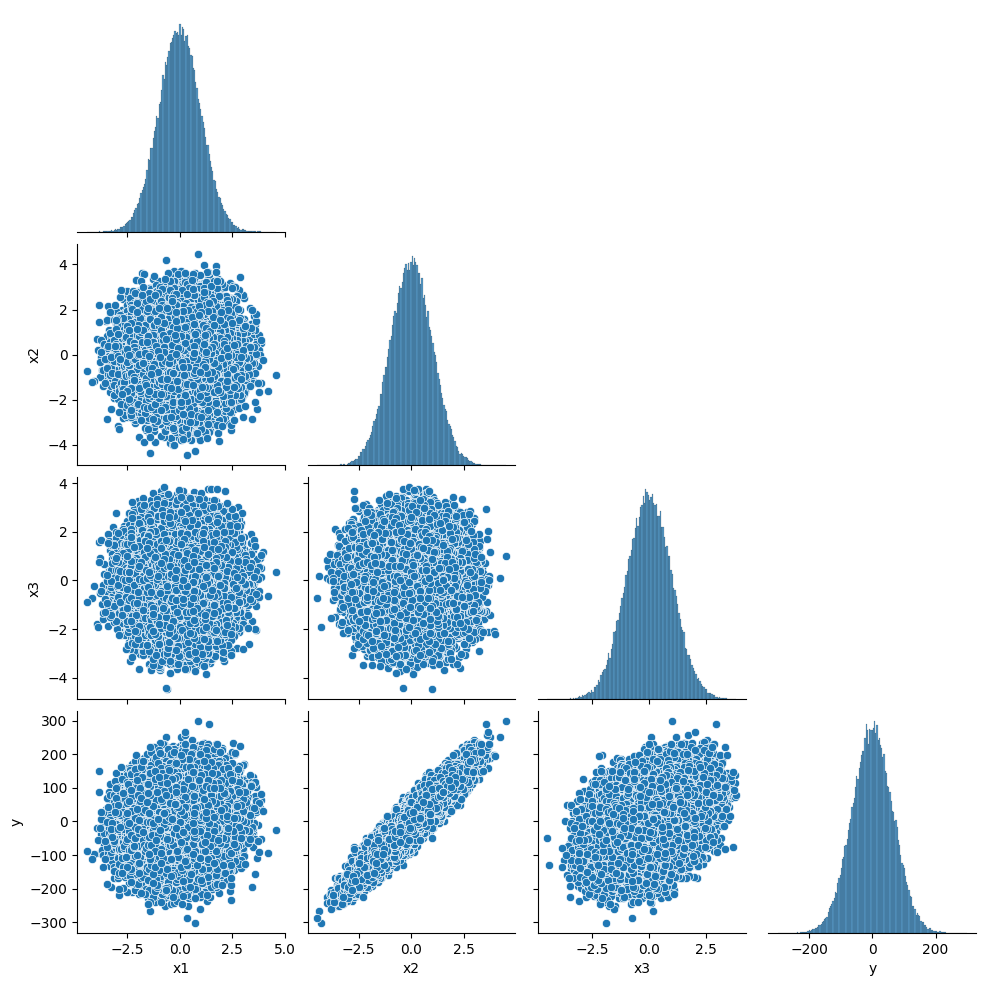

In [ ]:
seaborn.pairplot( data, corner=True )

<Axes: ylabel='Count'>

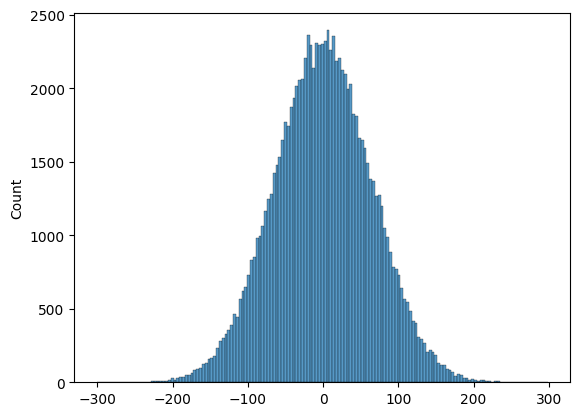

In [ ]:
import seaborn

seaborn.histplot( y )

<Axes: ylabel='Count'>

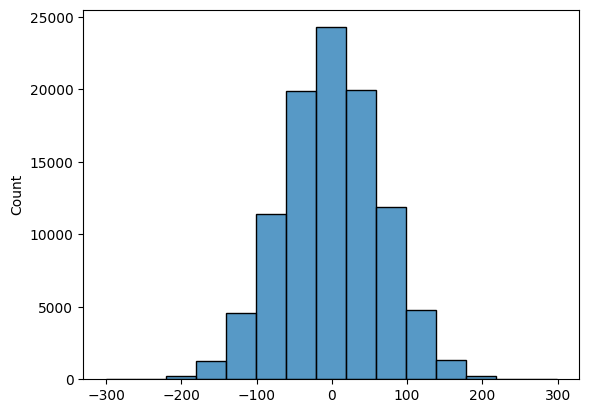

In [ ]:
seaborn.histplot( y, bins=15 )

#### Диаграмма размаха ( ящик с усами )

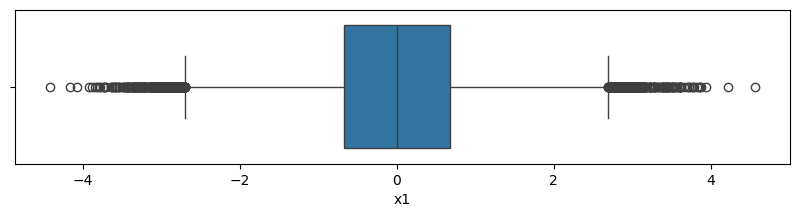

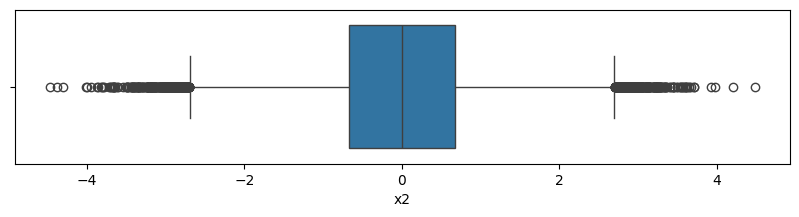

In [ ]:
# seaborn -- библиотека для визуализации. Использует библиотеку matplotlib

import matplotlib.pyplot as plt
# Шпаргалка по визуализации в miro: https://miro.com/app/board/uXjVNQC1rq8=/?moveToWidget=3458764569672021118&cot=14

plt.figure( figsize = (10, 2))
seaborn.boxplot( data['x1'], orient = "h"); plt.show()
plt.figure( figsize = (10, 2))
seaborn.boxplot( data['x2'], orient = "h"); plt.show()
# X[:,0] -- взять все строки, нулевую колонку массива (матрицы)

# todo: графики для остальных признаков

Границы закрашенной области ("ящика") - квартили q1 и q3, линии внутри области - медиана.

Вынесенные линии ("усы") - условный минимум и максимум (если убрать выбросы)

**Выбросы** - точки (окружности) за пределами "усов" - значения, существенно отличающиеся от совокупности остальных данных.

Здесь, значение считается выбросом если отстоит на 1.5 *(q3-q1) от медианы; универсального критерия выброса не существует.

См. примеры и описание в учебном пособии [4].

todo: другие графики

# Построение модели машинного обучения

In [ ]:
# линейная регрессия - модель машинного обучения, решающая задачу регрессии
# алгоритм обучения этой модели будет рассмотрен позднее
from sklearn.linear_model import LinearRegression

# создание объекта модели
linreg = LinearRegression()

# обучение линейной регрессии, т.е. подбор коэффициентов уравнения регрессии по известным данным
linreg.fit(X_train, y_train)

LinearRegression()

Само уравнение регрессии имеет вид
$$ \hat y  = b_0 + b_1 x_1 + b_2 x_2 + ... + b_m x_m$$

где
- $ \hat y$ - предсказываемое значение;
- $ x_i$ - значение i-го признака объекта;
- $ m$ - количество признаков объекта;
- $ b_0, b_1, ..., $ - подбираемые в процессе обучения коэффициенты

In [ ]:
# коэффиценты b1, b2, b3
linreg.coef_

array([ 5.08291676, 60.35760103, 23.53378553])

In [ ]:
# коэффицент b0
linreg.intercept_

9.71445146547012e-16

Запишем полученное уравнение линейной регрессии:


$$ y =  5.1 x_1  + 60.4 x_2  + 23.5 x_3  + 9.7 \cdot 10^{-16} $$

(формула записана в нотации LaTeX)

In [ ]:
# сделаем предсказание целевого признака для 1-го объекта (см. первую строку таблицы)
5.1 * 0.9 + 60.4 * 0.5 + 23.4 * 0.5 + 1.8e-15
# признаки первого объекта:
# 0.896987 	0.470192 	0.531624 	45.450103
# ответ (46.5) получился близким к правильному (45.5)

46.489999999999995

In [ ]:
# вычисления вверху приведены для примера, удобнее всего получать предсказание через метод predict
# он принимает массив из независимых признаков объекта
linreg.predict( [ [0.89698718,  0.47019215,  0.53162386] ] )


array([45.45010327])

# Оценка качества модели

In [ ]:
# предсказание y для объектов из тестовой выборки
y_pred_train = linreg.predict( X_train )        # y hat

In [ ]:
from sklearn.metrics import mean_squared_error
# https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error

# ошибка на трейне
mean_squared_error(y_train, y_pred_train)

1.901877756399086e-27

In [ ]:
y_pred = linreg.predict( X_test )        # y hat
# ошибка на тесте
mean_squared_error(y_test, y_pred)

1.9404642603163138e-27

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_train, y_pred_train)

1.0

In [ ]:
r2_score(y_test, y_pred)

1.0

**Вывод**

Ошибка модели очень маленькая. Значит модель хорошо описывает зависимость в данных.

Ошибка модели MSE на обучающей выборке и на тестовой практически одинаковы, значит модель не переобучилась.

# TODO:
- [ ] Оценить качество модели по разным показателям на обучающей и тестовый выборке

# Справка Markdown + LaTeX



```
# Заголовок 1
## Заголовок 2
### Заголовок 3
#### Заголовок 4
##### Заголовок 5

**жирный**

*курсив*

`текст моноширинным шрифтом`

```python
текст моноширинным шрифтом с подсветкой синтаксиса
``` (закрывающиеся кавычки)

$ формула внутри текста $

$$ формула внутри отдельной строки $$
```


**Некоторые обозначения $\LaTeX$** \
- `\cdot` — точка (знак скалярное произведения) — $\cdot$
- `\times` — точка (знак векторного произведения) — $\times$
- `x_y` — подстрочный индекс — $x_y$
- `x_{нижний индекс}` — нижний индекс из нескольких символов — $x_{нижний-индекс}$
- `x^y` — верхний индекс из нескольких символов — $x^y$
- `\hat{ y }` — шапочка, обозначает предсказываемое значение — $\hat{ y }$
- `\bar{ y }` — черта сверху (обозначает среднее) — $\bar{ y }$
- `\frac{a}{b}` — $\frac{a}{b}$
- `\alpha` — $\alpha$

http://tex.imm.uran.ru/tex/2e/lshort2e/node52.html — Список математических символов
http://www.itmathrepetitor.ru/shpargalka-po-latex/ — короткая шпаргалка с примерами формул


# Ссылки
1. План занятий: https://github.com/ivtipm/ML/blob/main/plans/facultative_2024_ML.md

2. [Слайды лекции: Введение в МО](https://docs.google.com/presentation/d/1mK9CfhwjQtAdJZENV3vU4nCGSkzI8_Ugkv_AavBVEaM/edit?usp=sharing)

2. Теория вероятностей.
3. [Слайды лекции по математической статистике](https://raw.githubusercontent.com/VetrovSV/AppMathST/master/statistics.pdf)


4. [Математические модели и вычислительные методы обработки экспериментальных данных](https://github.com/ivtipm/ML/blob/2c81049c9f1056d3be594642fde8c70d2d268d25/%D0%9C%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5%20%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8%20%D0%B8%20%D0%B2%D1%8B%D1%87%D0%B8%D1%81%D0%BB%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5%20%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D1%8B%20%D0%BE%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B8%20%D1%8D%D0%BA%D1%81%D0%BF%D0%B5%D1%80%D0%B8%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D1%85%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.pdf)
    - построение графиков, numpy, pandas